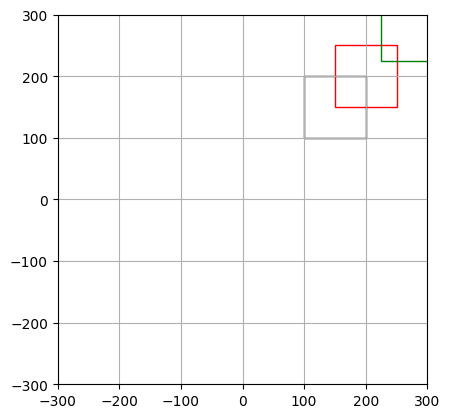

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def draw_rectangle(ax, x1, y1, x2, y2, color='b'):
    rectangle = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor=color, fill=False)
    ax.add_patch(rectangle)

def translation(x1, y1, x2, y2, tx, ty):
    return x1 + tx, y1 + ty, x2 + tx, y2 + ty

def scaling(x1, y1, x2, y2, sx, sy):
    return x1 * sx, y1 * sy, x2 * sx, y2 * sy

def rotation(x1, y1, x2, y2, angle):
    radian = np.radians(angle)
    cos_a, sin_a = np.cos(radian), np.sin(radian)

    def rotate_point(x, y):
        return x * cos_a - y * sin_a, x * sin_a + y * cos_a

    x1r, y1r = rotate_point(x1, y1)
    x2r, y2r = rotate_point(x2, y2)
    return x1r, y1r, x2r, y2r

def reflection(x1, y1, x2, y2, x_axis=True):
    if x_axis:
        return x1, -y1, x2, -y2
    else:
        return -x1, y1, -x2, y2

def shearing(x1, y1, x2, y2, shx, shy):
    def shear_point(x, y):
        return x + shx * y, y + shy * x

    x1s, y1s = shear_point(x1, y1)
    x2s, y2s = shear_point(x2, y2)
    return x1s, y1s, x2s, y2s

# Main program
if __name__ == "__main__":
    fig, ax = plt.subplots()
    ax.set_xlim(-300, 300)
    ax.set_ylim(-300, 300)
    ax.set_aspect('equal')

    # Initial rectangle coordinates
    x1, y1, x2, y2 = 100, 100, 200, 200
    draw_rectangle(ax, x1, y1, x2, y2, color='black')

    # Translation
    x1, y1, x2, y2 = translation(x1, y1, x2, y2, 50, 50)
    draw_rectangle(ax, x1, y1, x2, y2, color='red')

    # Scaling
    x1, y1, x2, y2 = scaling(x1, y1, x2, y2, 1.5, 1.5)
    draw_rectangle(ax, x1, y1, x2, y2, color='green')

    # Rotation
    x1, y1, x2, y2 = rotation(x1, y1, x2, y2, 45)
    draw_rectangle(ax, x1, y1, x2, y2, color='blue')

    # Reflection
    x1, y1, x2, y2 = reflection(x1, y1, x2, y2, x_axis=True)
    draw_rectangle(ax, x1, y1, x2, y2, color='yellow')

    # Shearing
    x1, y1, x2, y2 = shearing(x1, y1, x2, y2, 1.0, 0.5)
    draw_rectangle(ax, x1, y1, x2, y2, color='purple')

    plt.grid(True)
    plt.show()


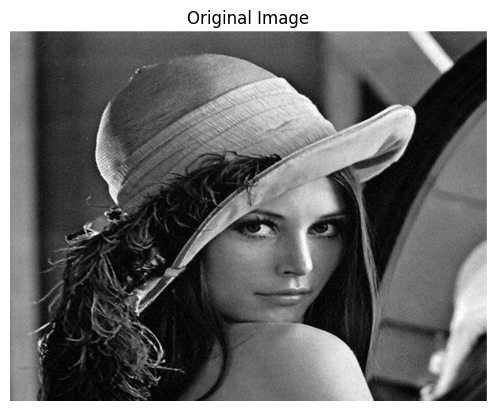

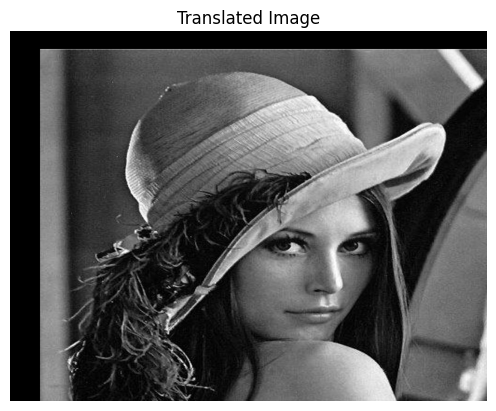

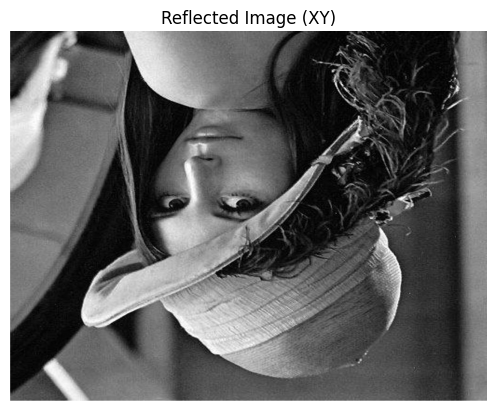

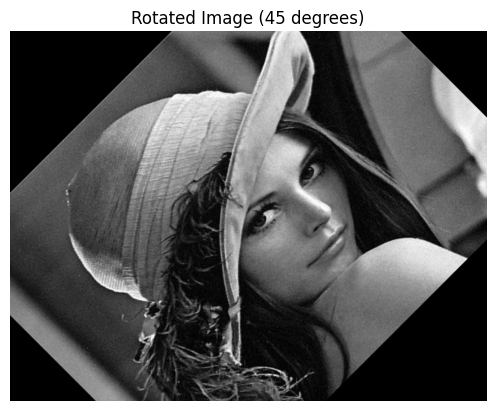

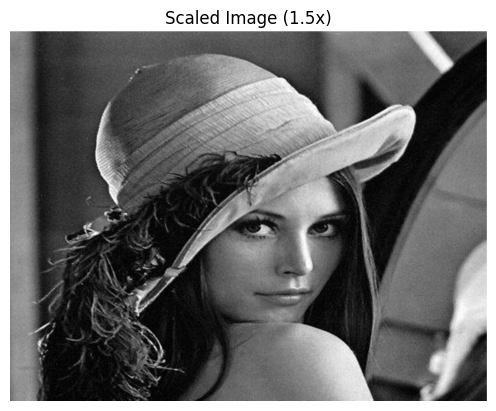

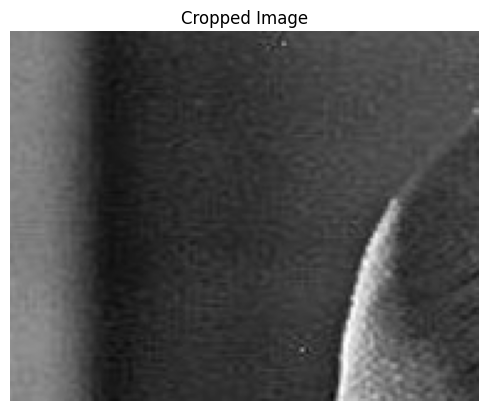

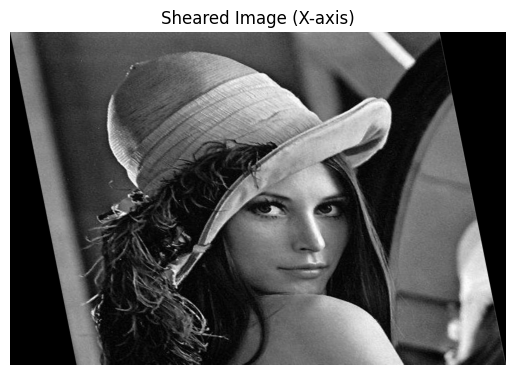

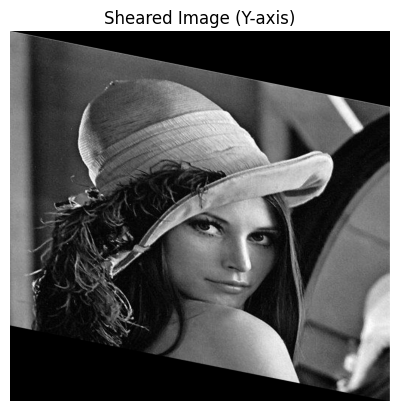

Design By Amrit 


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_image(title, image):
    """Display an image using Matplotlib."""
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load the image
image_path = "/content/SAMPLE.jpg"  # Replace with your image path
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError(f"Image not found at {image_path}")

# Display the original image
display_image("Original Image", image)

# Image Translation
def translate_image(image, tx, ty):
    rows, cols = image.shape[:2]
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    translated_image = cv2.warpAffine(image, translation_matrix, (cols, rows))
    return translated_image

translated_image = translate_image(image, 50, 30)
display_image("Translated Image", translated_image)

# Reflection
def reflect_image(image, axis):
    if axis == 'x':
        reflected_image = cv2.flip(image, 0)
    elif axis == 'y':
        reflected_image = cv2.flip(image, 1)
    elif axis == 'xy':
        reflected_image = cv2.flip(image, -1)
    else:
        raise ValueError("Axis must be 'x', 'y', or 'xy'")
    return reflected_image

reflected_image = reflect_image(image, 'xy')
display_image("Reflected Image (XY)", reflected_image)

# Rotation
def rotate_image(image, angle):
    rows, cols = image.shape[:2]
    center = (cols // 2, rows // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
    return rotated_image

rotated_image = rotate_image(image, 45)
display_image("Rotated Image (45 degrees)", rotated_image)

# Scaling
def scale_image(image, fx, fy):
    scaled_image = cv2.resize(image, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)
    return scaled_image

scaled_image = scale_image(image, 1.5, 1.5)
display_image("Scaled Image (1.5x)", scaled_image)

# Cropping
def crop_image(image, start_x, start_y, end_x, end_y):
    cropped_image = image[start_y:end_y, start_x:end_x]
    return cropped_image

cropped_image = crop_image(image, 10, 50, 200, 200)
display_image("Cropped Image", cropped_image)

# Shearing in X-axis
def shear_image_x(image, shear_factor):
    rows, cols = image.shape[:2]
    shear_matrix = np.float32([[1, shear_factor, 0], [0, 1, 0]])
    sheared_image = cv2.warpAffine(image, shear_matrix, (cols + int(shear_factor * rows), rows))
    return sheared_image

sheared_image_x = shear_image_x(image, 0.2)
display_image("Sheared Image (X-axis)", sheared_image_x)

# Shearing in Y-axis
def shear_image_y(image, shear_factor):
    rows, cols = image.shape[:2]
    shear_matrix = np.float32([[1, 0, 0], [shear_factor, 1, 0]])
    sheared_image = cv2.warpAffine(image, shear_matrix, (cols, rows + int(shear_factor * cols)))
    return sheared_image

sheared_image_y = shear_image_y(image, 0.2)
display_image("Sheared Image (Y-axis)", sheared_image_y)

print ("Design By Amrit ")
